# Preprocess Datasets and Extract Features
> Feature engineering notebook

Dataset columns (same convention as the lab1):

| Col1 | Col2 | Col3 | Col3 | $\dots$ |
|------|------|------|------|---------|
| $Y$  |$Y_0$ | $X_1$| $X_2$| $\dots$ |

- $Y$ : labels or target values, in our case $X(T+5)$
- $Y_0$ : present value $X(T+0)$
- $X_1$, $X_2$, $\dots$ : other features

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Import Normalized Datasets

In [ ]:
# Training data
with open('train_norm.npy', 'rb') as f:
    train_norm = np.load(f)
# Testing data
with open('test_norm.npy', 'rb') as f:
    test_norm = np.load(f)

## Extract Features

- Revision video: [Session 3: The Prediction Pipeline](https://youtu.be/4W6-48wXXEc?t=1246)

number of samples in normalized datasets

In [ ]:
print("train_norm: {} samples\ntest_norm : {} samples".format(train_norm.shape[0],test_norm.shape[0]))

train_norm: 23032 samples
test_norm : 9871 samples


### Naive Window as Features

In [ ]:
from datautils import windowed_data

In [ ]:
window_size = 6 # Y(T+0) and 5 previous points, T-1,...,T-4,T-5
lead_time = 5 # T+5
start_time = window_size-1 # index of last elem of window

- Traing dataset, with window width 6; columns:`[Y(T+5), Y(T+0), ...,Y(T-5)]` 

In [ ]:
X_train = windowed_data(train_norm, lead_time=lead_time, window_size=window_size)
print('Training dataset (1st column is target Y(T+5)):',X_train.shape)

Training dataset (1st column is target Y(T+5)): (23022, 7)


- Testing dataset

In [ ]:
X_test = windowed_data(test_norm, lead_time=lead_time, window_size=window_size)
print('Testing dataset (1st column is target Y(T+5)):',X_test.shape)

Testing dataset (1st column is target Y(T+5)): (9861, 7)


---

write training datasets to :
- `train_preprocessed_naive.npy` and
- `test_preprocessed_naive.npy`

In [ ]:
# Training data
with open('train_preprocessed_naive.npy', 'wb') as f:
    np.save(f,X_train)
# Testing data
with open('test_preprocessed_naive.npy', 'wb') as f:
    np.save(f,X_test)

### Differences as Features

- First column is `Y(T+5)`
- 2nd column is `Y(T+0)`, present value
- 3rd to 7th are differences: `[Y(T+0)-Y(T-1), Y(T-1)-Y(T-2), Y(T-2)-Y(T-3), Y(T-3)-Y(T-4), Y(T-4)-Y(T-5)]`

In [ ]:
from datautils import windowed_diff_data

In [ ]:
window_size = 6 # Y(T+0) and 5 previous points, T-1,...,T-4,T-5
lead_time = 5 # T+5
start_time = window_size-1 # index of last elem of window

- Traing dataset, with window width 6 

In [ ]:
X_train = windowed_diff_data(train_norm, lead_time=lead_time, window_size=window_size)
print('Training dataset (1st column is target Y(T+5)):',X_train.shape)

Training dataset (1st column is target Y(T+5)): (23022, 7)


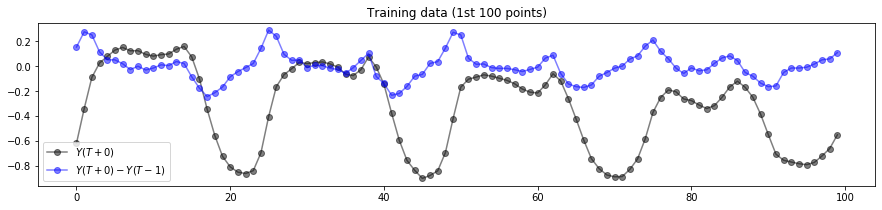

In [ ]:
n_points = 100 # plot 1st n_points
plt.figure(figsize=[15,3])
# plt.plot(X_test[:,2:],'o-',alpha=.3);
plt.plot(X_train[:n_points,1],'ko-',alpha=.5,label='$Y(T+0)$');
plt.plot(X_train[:n_points,2],'bo-',alpha=.5,label='$Y(T+0)-Y(T-1)$');
plt.legend()
plt.title('Training data (1st {} points)'.format(n_points))
plt.show()

- Testing dataset

In [ ]:
X_test = windowed_diff_data(test_norm, lead_time=lead_time, window_size=window_size)
print('Testing dataset (1st column is target Y(T+5)):',X_test.shape)

Testing dataset (1st column is target Y(T+5)): (9861, 7)


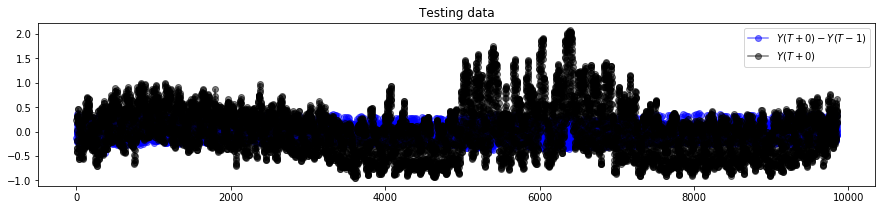

In [ ]:
plt.figure(figsize=[15,3])
# plt.plot(X_test[:,2:],'o-',alpha=.3);
plt.plot(X_test[:,2],'bo-',alpha=.5,label='$Y(T+0)-Y(T-1)$');
plt.plot(X_test[:,1],'ko-',alpha=.5,label='$Y(T+0)$');
plt.legend()
plt.title('Testing data')
plt.show()

---

write training datasets to :
- `train_preprocessed_diff5.npy` and
- `test_preprocessed_diff5.npy`

`diff5` part stands for difference data for differences from `T-5` to `T+0` (5 $\Delta T$'s)

In [ ]:
# Training data
with open('train_preprocessed_diff5.npy', 'wb') as f:
    np.save(f,X_train)
# Testing data
with open('test_preprocessed_diff5.npy', 'wb') as f:
    np.save(f,X_test)